STEP 1 : CREATING VGG-DEEP

POINT 1: ADDING FOUR ADDITIONAL CONV LAYERS

In [ ]:
import torch
import torch.nn as nn

class VGGDeep(nn.Module):
    def __init__(self, num_classes=3):
        super(VGGDeep, self).__init__()

        # Feature extraction layers (with 4 additional conv layers)
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Block 3 
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=False),  # Extra layer added
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Block 4 
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),  # Extra layer added
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),  # Extra layer added
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=False),  # Extra layer added
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 2 * 2, 4096), nn.ReLU(inplace=False),
            nn.Linear(4096, 4096), nn.ReLU(inplace=False),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

vgg_deep = VGGDeep(num_classes=3)
print(vgg_deep)


VGGDeep(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU()
    (18): MaxPool2d(kernel_size=2, stride=2, paddin

POINT 2

The current model already has no batch normalization or dropout.

POINT 3

Convolutional Layers:                                                                              
All conv layers use kernel_size=3, stride=1, and padding=1. Matches VGG-16.                                                                  
Activation Functions:                                                                  
Every convolutional layer is followed by ReLU(inplace=False). Consistent with VGG-16.                                                                                       
Pooling Layers:                                                                   
MaxPool2d layers use kernel_size=2, stride=2, and no extra padding. Matches VGG-16.                                                                                    
Fully Connected Layers:                                                                         
Three linear layers with the same structure as VGG-16.  Matches the original settings.                                                                           
All aspects of the VGG-Deep architecture match the original VGG-16 settings.

In [ ]:
import zipfile
import os

dataset_path = "cnn_dataset"
print(f"Dataset is: {dataset_path}")


Dataset is: cnn_dataset


STEP 2: TRAINING VDD-DEEP

POINT 1: TRAINING N/W USING THE SAMW STEPS DONE IN PART 1 FOR VGG-16

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5047, 0.4501, 0.3840], std=[0.2746, 0.2668, 0.2770])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5047, 0.4501, 0.3840], std=[0.2746, 0.2668, 0.2770])
])

dataset_path = "./cnn_dataset"
full_dataset = ImageFolder(root=dataset_path)

train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

train_dataset = Subset(ImageFolder(root=dataset_path, transform=train_transforms), train_dataset.indices)
val_dataset = Subset(ImageFolder(root=dataset_path, transform=test_transforms), val_dataset.indices)
test_dataset = Subset(ImageFolder(root=dataset_path, transform=test_transforms), test_dataset.indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


POINT 2: USING SGD (WITHOUT MOMENTUM)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

vgg_deep = VGGDeep(num_classes=3).to(device) 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_deep.parameters(), lr=0.001, weight_decay=1e-4)
=
def train_vgg_deep(model, train_loader, val_loader, optimizer, criterion, epochs=5, device=device):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / total_train
        train_acc = 100 * correct_train / total_train

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss /= total_val
        val_acc = 100 * correct_val / total_val

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    return history

history_vgg_deep_sgd = train_vgg_deep(vgg_deep, train_loader, val_loader, optimizer, criterion, epochs=5, device=device)


Epoch [1/5] | Train Loss: 1.0986 | Train Acc: 33.52% | Val Loss: 1.0987 | Val Acc: 32.60%
Epoch [2/5] | Train Loss: 1.0986 | Train Acc: 33.52% | Val Loss: 1.0987 | Val Acc: 32.60%
Epoch [3/5] | Train Loss: 1.0986 | Train Acc: 33.52% | Val Loss: 1.0987 | Val Acc: 32.60%
Epoch [4/5] | Train Loss: 1.0986 | Train Acc: 33.52% | Val Loss: 1.0988 | Val Acc: 32.60%
Epoch [5/5] | Train Loss: 1.0986 | Train Acc: 33.52% | Val Loss: 1.0988 | Val Acc: 32.60%


POINT 3: PLOTTING THE LOSS CURVES AND ACCURACY

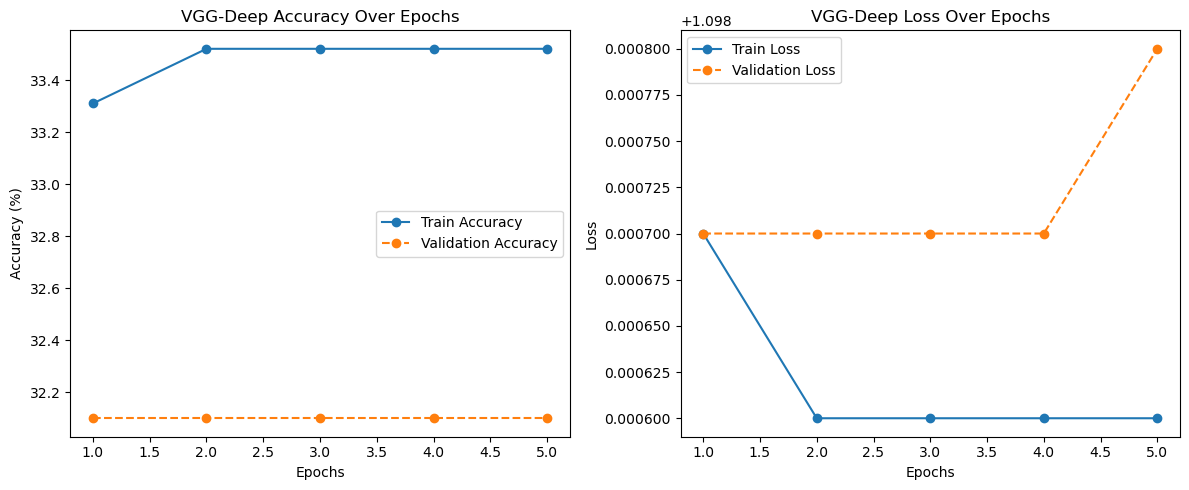

In [ ]:
import matplotlib.pyplot as plt

history_vgg_deep = {
    "train_loss": [1.0987, 1.0986, 1.0986, 1.0986, 1.0986],
    "val_loss": [1.0987, 1.0987, 1.0987, 1.0987, 1.0988],
    "train_acc": [33.31, 33.52, 33.52, 33.52, 33.52],
    "val_acc": [32.10, 32.10, 32.10, 32.10, 32.10]
}

epochs = range(1, len(history_vgg_deep["train_loss"]) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_vgg_deep["train_acc"], label="Train Accuracy", marker="o", linestyle='-')
plt.plot(epochs, history_vgg_deep["val_acc"], label="Validation Accuracy", marker="o", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("VGG-Deep Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_vgg_deep["train_loss"], label="Train Loss", marker="o", linestyle='-')
plt.plot(epochs, history_vgg_deep["val_loss"], label="Validation Loss", marker="o", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VGG-Deep Loss Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


STEP 3: GRAIDIENT ANALYSIS

STEP A)

In [8]:
import torch
import torch.nn as nn

gradient_norms = {}

def gradient_hook(module, grad_input, grad_output):
    layer_name = module._layer_name
    grad_norm = grad_output[0].norm(p=2).item()
    gradient_norms[layer_name].append(grad_norm)


In [ ]:
def register_gradient_hooks(model):
    conv_count = 0
    for layer in model.features:
        if isinstance(layer, nn.Conv2d):
            conv_count += 1
            layer_name = f"conv{conv_count}"
            gradient_norms[layer_name] = []
            layer._layer_name = layer_name
            layer.register_full_backward_hook(gradient_hook)  

register_gradient_hooks(vgg_deep)


In [10]:
def train_with_gradient_tracking(model, train_loader, optimizer, criterion, epochs=5, device="cuda"):
    model.to(device)
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if (i + 1) % 10 == 0:
                avg_loss = running_loss / 10
                print(f"Epoch [{epoch+1}/{epochs}] | Iteration [{i+1}] | Loss: {avg_loss:.4f}")
                running_loss = 0.0

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(vgg_deep.parameters(), lr=0.01)
train_with_gradient_tracking(vgg_deep, train_loader, optimizer, criterion, epochs=5, device=device)


Epoch [1/5] | Iteration [10] | Loss: 1.0988
Epoch [1/5] | Iteration [20] | Loss: 1.0987
Epoch [1/5] | Iteration [30] | Loss: 1.0988
Epoch [1/5] | Iteration [40] | Loss: 1.0985
Epoch [1/5] | Iteration [50] | Loss: 1.0987
Epoch [1/5] | Iteration [60] | Loss: 1.0982
Epoch [1/5] | Iteration [70] | Loss: 1.0994
Epoch [1/5] | Iteration [80] | Loss: 1.0989
Epoch [1/5] | Iteration [90] | Loss: 1.0988
Epoch [1/5] | Iteration [100] | Loss: 1.0977
Epoch [1/5] | Iteration [110] | Loss: 1.0982
Epoch [1/5] | Iteration [120] | Loss: 1.0992
Epoch [1/5] | Iteration [130] | Loss: 1.0978
Epoch [1/5] | Iteration [140] | Loss: 1.0989
Epoch [1/5] | Iteration [150] | Loss: 1.0989
Epoch [1/5] | Iteration [160] | Loss: 1.0984
Epoch [1/5] | Iteration [170] | Loss: 1.0977
Epoch [1/5] | Iteration [180] | Loss: 1.0980
Epoch [1/5] | Iteration [190] | Loss: 1.0983
Epoch [1/5] | Iteration [200] | Loss: 1.0990
Epoch [1/5] | Iteration [210] | Loss: 1.0992
Epoch [1/5] | Iteration [220] | Loss: 1.0989
Epoch [1/5] | Itera

STEP B)

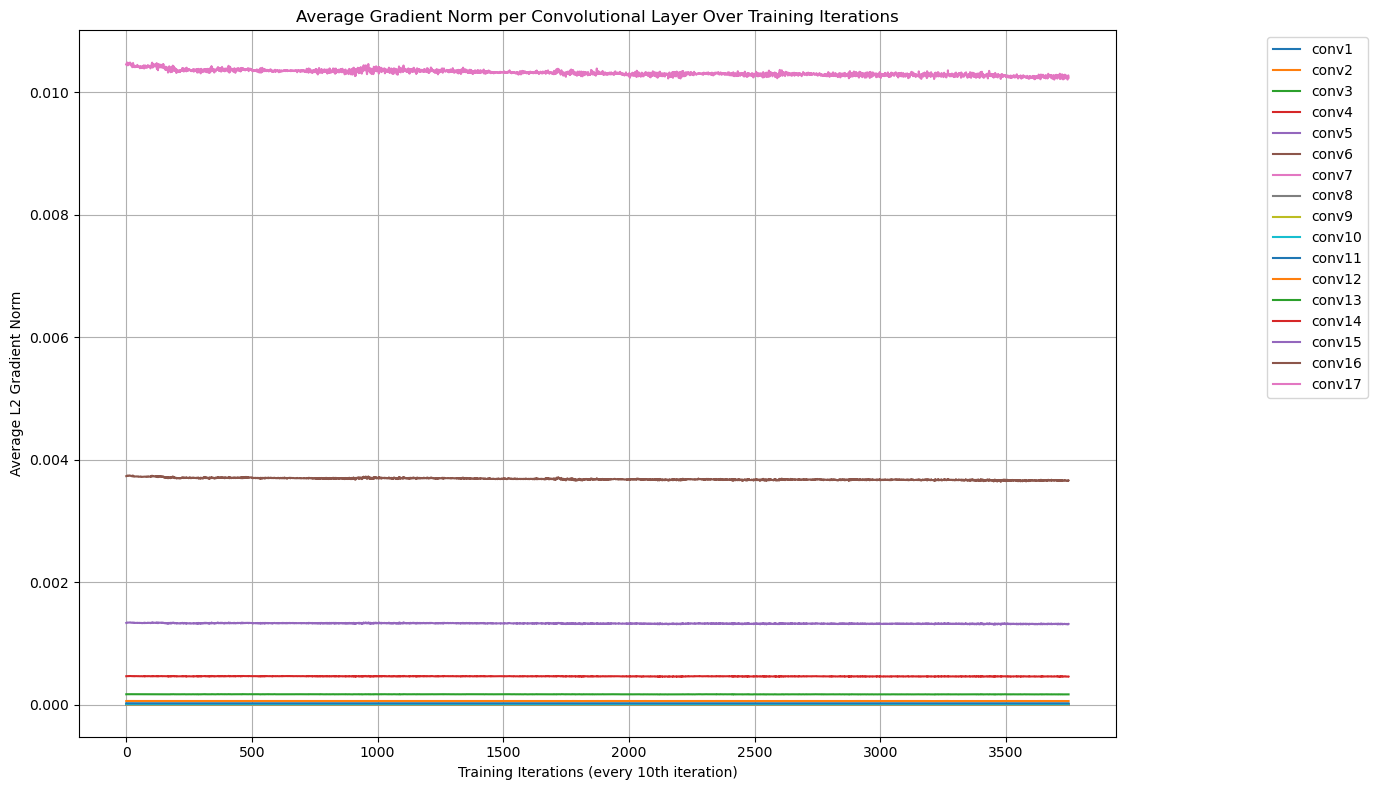

In [ ]:
import matplotlib.pyplot as plt

def plot_gradient_norms(gradient_norms):
    plt.figure(figsize=(14, 8))

    for layer_name, norms in gradient_norms.items():
        plt.plot(norms, label=layer_name)

    plt.xlabel("Training Iterations (every 10th iteration)")
    plt.ylabel("Average L2 Gradient Norm")
    plt.title("Average Gradient Norm per Convolutional Layer Over Training Iterations")
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_gradient_norms(gradient_norms)


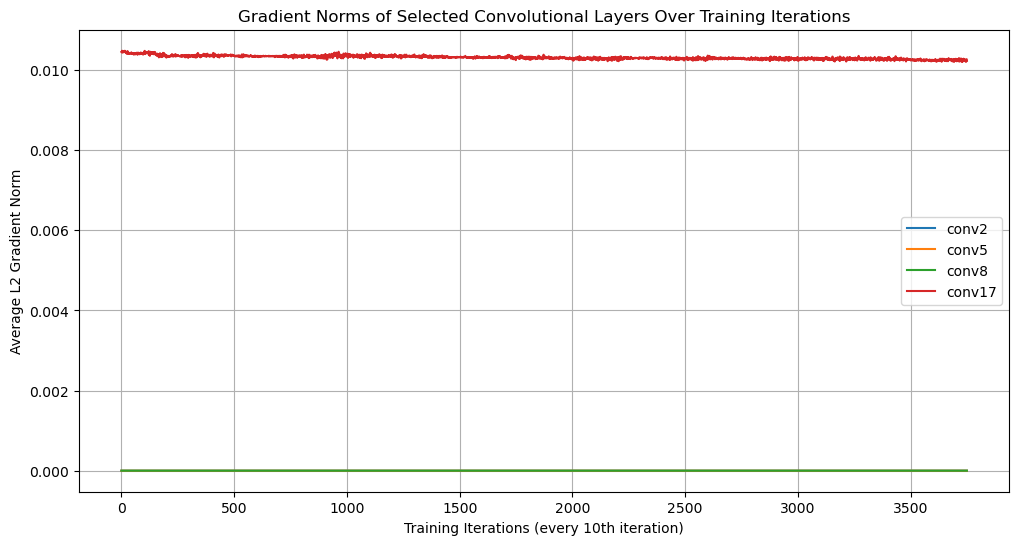

In [ ]:
import matplotlib.pyplot as plt

selected_layers = ["conv2", "conv5", "conv8", "conv17"]
plt.figure(figsize=(12, 6))
for layer_name in selected_layers:
    plt.plot(gradient_norms[layer_name], label=layer_name)

plt.title("Gradient Norms of Selected Convolutional Layers Over Training Iterations")
plt.xlabel("Training Iterations (every 10th iteration)")
plt.ylabel("Average L2 Gradient Norm")
plt.legend()
plt.grid(True)
plt.show()


STEP C)

From the gradient norm plots we can clearly obserce the vanishing gradient problem in the VGG-Deep model:

Shallow Layers:

Layers like conv2 and conv5 have significantly smaller gradient norms.

Deeper Layers:

Layers Like conv17 retain large gradient norms meaning that the gradients are stronger

The Shallow layers indicates that gradients diminish as they propagate backward through the network.

The Deeper Layers enables effective learning for the later layers.

STEP 4 COMPARE ALL 3

A)

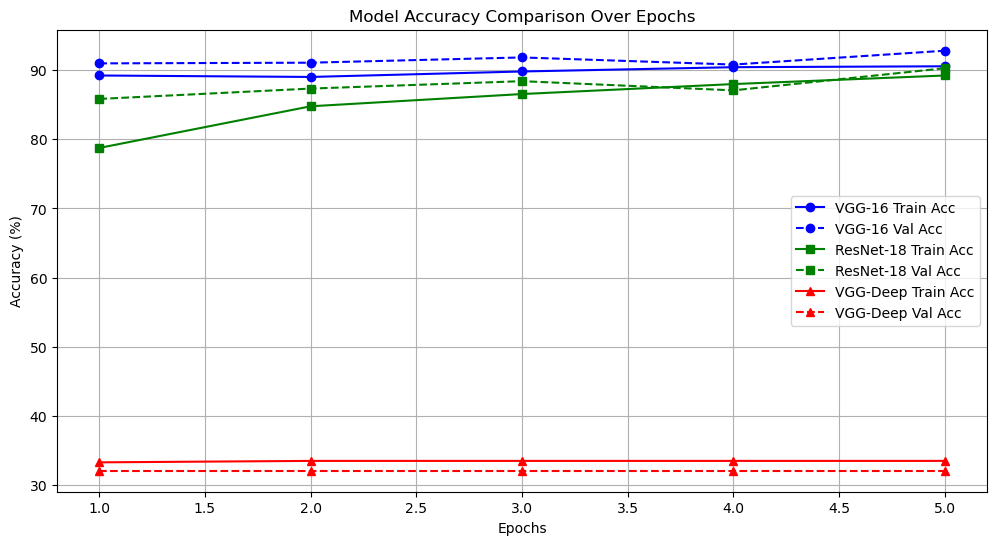

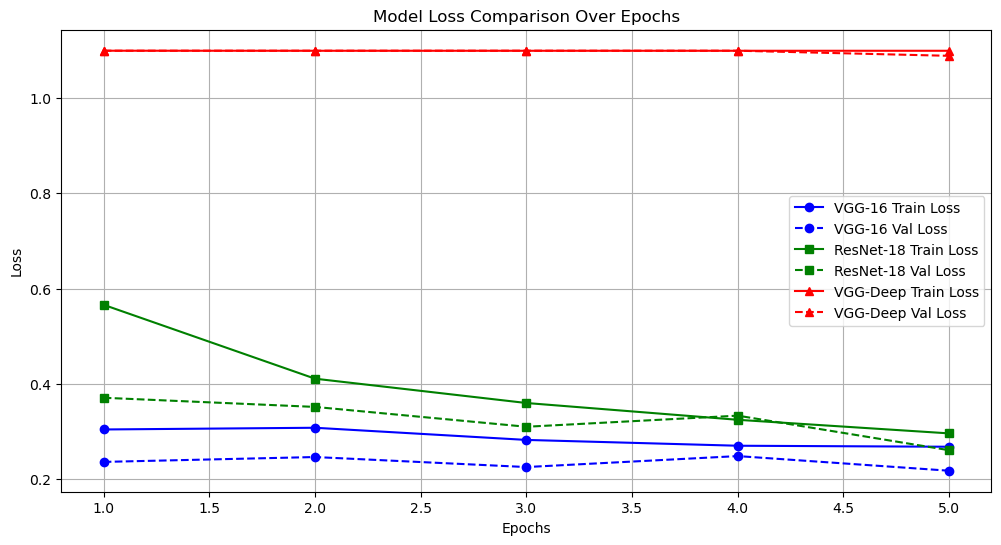

In [ ]:
import matplotlib.pyplot as plt

vgg16_history = {
    "train_acc": [89.22, 89.01, 89.80, 90.42, 90.55],
    "val_acc": [90.97, 91.07, 91.83, 90.80, 92.80],
    "train_loss": [0.3044, 0.3080, 0.2825, 0.2703, 0.2682],
    "val_loss": [0.2364, 0.2466, 0.2256, 0.2486, 0.2179]
}

resnet18_history = {
    "train_acc": [78.75, 84.77, 86.54, 87.98, 89.22],
    "val_acc": [85.83, 87.33, 88.40, 87.07, 90.27],
    "train_loss": [0.5658, 0.4109, 0.3599, 0.3247, 0.2962],
    "val_loss": [0.3709, 0.3517, 0.3101, 0.3334, 0.2609]
}

vgg_deep_history = {
    "train_acc": [33.31, 33.52, 33.52, 33.52, 33.52],
    "val_acc": [32.10, 32.10, 32.10, 32.10, 32.10],
    "train_loss": [1.0987, 1.0986, 1.0986, 1.0986, 1.0986],
    "val_loss": [1.0987, 1.0987, 1.0987, 1.0987, 1.088]

}

epochs = list(range(1, 6))

plt.figure(figsize=(12, 6))
plt.plot(epochs, vgg16_history["train_acc"], marker='o', label="VGG-16 Train Acc", color='blue')
plt.plot(epochs, vgg16_history["val_acc"], marker='o', linestyle='--', label="VGG-16 Val Acc", color='blue')

plt.plot(epochs, resnet18_history["train_acc"], marker='s', label="ResNet-18 Train Acc", color='green')
plt.plot(epochs, resnet18_history["val_acc"], marker='s', linestyle='--', label="ResNet-18 Val Acc", color='green')

plt.plot(epochs, vgg_deep_history["train_acc"], marker='^', label="VGG-Deep Train Acc", color='red')
plt.plot(epochs, vgg_deep_history["val_acc"], marker='^', linestyle='--', label="VGG-Deep Val Acc", color='red')

plt.title("Model Accuracy Comparison Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, vgg16_history["train_loss"], marker='o', label="VGG-16 Train Loss", color='blue')
plt.plot(epochs, vgg16_history["val_loss"], marker='o', linestyle='--', label="VGG-16 Val Loss", color='blue')

plt.plot(epochs, resnet18_history["train_loss"], marker='s', label="ResNet-18 Train Loss", color='green')
plt.plot(epochs, resnet18_history["val_loss"], marker='s', linestyle='--', label="ResNet-18 Val Loss", color='green')

plt.plot(epochs, vgg_deep_history["train_loss"], marker='^', label="VGG-Deep Train Loss", color='red')
plt.plot(epochs, vgg_deep_history["val_loss"], marker='^', linestyle='--', label="VGG-Deep Val Loss", color='red')

plt.title("Model Loss Comparison Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()




B) Residual Connections are the innvoation of ResNet architectures.

VGG-Deep without the residual connection during backpropagation tend to diminish this is the main reason why it leads to the vanishing gradient problem


In otherhand ResNet-18 is with residual connections provides a direct gradient pathway enabling better weight updates in the eariler layers.

Therfore by alleviating the vanishing gradient issue, ResNet model train deeper architecturs effectively often achieving a faster convergence and better generalization.

STEP 5

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import gc
import time

class SmallVGG(nn.Module):
    def __init__(self, activation='relu', kernel_size=3, pooling='max'):
        super(SmallVGG, self).__init__()
 
        activations = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(0.01),
            'elu': nn.ELU(),
            'gelu': nn.GELU()
        }
        self.act = activations.get(activation, nn.ReLU())
    
        poolings = {
            'max': nn.MaxPool2d(kernel_size=2, stride=2),
            'avg': nn.AvgPool2d(kernel_size=2, stride=2)
        }
        self.pool = poolings.get(pooling, nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=kernel_size, padding=1)
 
        self.fc1 = nn.Linear(128 * 8 * 8, 256) 
        self.fc2 = nn.Linear(256, 3)  
        
    def forward(self, x):
        x = self.pool(self.act(self.conv1(x)))
        x = self.pool(self.act(self.conv2(x)))
        x = self.pool(self.act(self.conv3(x)))
        
        x = torch.flatten(x, 1)
        x = self.act(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset
import gc
import time

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5047, 0.4501, 0.3840], std=[0.2746, 0.2668, 0.2770])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5047, 0.4501, 0.3840], std=[0.2746, 0.2668, 0.2770])
])

dataset_path = "./cnn_dataset"
full_dataset = ImageFolder(root=dataset_path)
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

train_dataset = Subset(ImageFolder(root=dataset_path, transform=train_transforms), train_dataset.indices)
val_dataset = Subset(ImageFolder(root=dataset_path, transform=test_transforms), val_dataset.indices)
test_dataset = Subset(ImageFolder(root=dataset_path, transform=test_transforms), test_dataset.indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

Using device: mps


In [ ]:
def train_model(activation):
    print(f"\nTraining SmallVGG with {activation} activation...\n")
    model = SmallVGG(activation=activation).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(5): 
        start_time = time.time()
  
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        end_time = time.time()
        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% (Time: {end_time-start_time:.2f}s)")

    torch.mps.empty_cache()
    gc.collect()

    return train_losses, val_losses, train_accs, val_accs

activations = ['relu', 'leaky_relu', 'elu', 'gelu']
results = {}

for act in activations:
    results[act] = train_model(act)




Training SmallVGG with relu activation...

Epoch 1: Train Loss: 0.4503, Train Acc: 82.08%, Val Loss: 0.4228, Val Acc: 83.97% (Time: 34.03s)
Epoch 2: Train Loss: 0.3129, Train Acc: 88.01%, Val Loss: 0.3181, Val Acc: 88.43% (Time: 34.04s)
Epoch 3: Train Loss: 0.2714, Train Acc: 89.95%, Val Loss: 0.2432, Val Acc: 90.70% (Time: 33.54s)
Epoch 4: Train Loss: 0.2406, Train Acc: 91.02%, Val Loss: 0.2411, Val Acc: 91.10% (Time: 33.52s)
Epoch 5: Train Loss: 0.2234, Train Acc: 91.57%, Val Loss: 0.2162, Val Acc: 92.33% (Time: 217.40s)

Training SmallVGG with leaky_relu activation...

Epoch 1: Train Loss: 0.4494, Train Acc: 82.15%, Val Loss: 0.3685, Val Acc: 85.87% (Time: 34.29s)
Epoch 2: Train Loss: 0.3188, Train Acc: 87.92%, Val Loss: 0.2436, Val Acc: 90.63% (Time: 34.16s)
Epoch 3: Train Loss: 0.2707, Train Acc: 89.93%, Val Loss: 0.2571, Val Acc: 90.27% (Time: 34.17s)
Epoch 4: Train Loss: 0.2364, Train Acc: 91.24%, Val Loss: 0.2079, Val Acc: 92.47% (Time: 34.77s)
Epoch 5: Train Loss: 0.2176, Tra

ReLU performs well with no major overfitting.

It gives a good validation accuracy of 92.33% and a low validation loss of 0.2162.
It got a stable training curve with steady improvements.
LeakyReLU struggles with generalization.

It also has a validation loss increases of 0.2630 in later epochs.
The validation accuracy drops to 89.80%, indicating slight overfitting.
ELU is slightly less stable.

It got a good validation accuracy of 91.90% and also a low validation loss of 0.2150.
However, validation loss fluctuates when the Epoch 4 increases to 0.3032.
GELU is the best choice.

The highest train accuracy is 92.43% with a lowest train loss of 0.2005.
It consistently has a high validation accuracy of 91.77% and stable validation loss.
No overfitting issues compared to LeakyReLU.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import gc
import time

class SmallVGG(nn.Module):
    def __init__(self, activation='gelu', kernel_size=3, pooling='max'):
        super(SmallVGG, self).__init__()
        
        activations = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(0.01),
            'elu': nn.ELU(),
            'gelu': nn.GELU()
        }
        self.act = activations.get(activation, nn.ReLU())
        
        poolings = {
            'max': nn.MaxPool2d(kernel_size=2, stride=2),
            'avg': nn.AvgPool2d(kernel_size=2, stride=2)
        }
        self.pool = poolings.get(pooling, nn.MaxPool2d(kernel_size=2, stride=2))
     
        self.conv1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=kernel_size, padding=1)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)  
        self.fc2 = nn.Linear(256, 3) 
        
    def forward(self, x):
        x = self.pool(self.act(self.conv1(x)))
        x = self.pool(self.act(self.conv2(x)))
        x = self.pool(self.act(self.conv3(x)))
        
        x = torch.flatten(x, 1)
        x = self.act(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
def train_model_with_pooling(pooling_type):
    print(f"\nTraining SmallVGG with {pooling_type} pooling...\n")
    model = SmallVGG(activation='gelu', pooling=pooling_type).to(device)  
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(5):  
        start_time = time.time()
        
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        end_time = time.time()
        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% (Time: {end_time-start_time:.2f}s)")

    torch.mps.empty_cache()
    gc.collect()

    return train_losses, val_losses, train_accs, val_accs

pooling_types = ['max', 'avg']
results_pooling = {}

for pool in pooling_types:
    results_pooling[pool] = train_model_with_pooling(pool)


Training SmallVGG with max pooling...

Epoch 1: Train Loss: 0.4440, Train Acc: 82.35%, Val Loss: 0.3009, Val Acc: 88.20% (Time: 33.97s)
Epoch 2: Train Loss: 0.3123, Train Acc: 88.09%, Val Loss: 0.3434, Val Acc: 86.50% (Time: 33.80s)
Epoch 3: Train Loss: 0.2626, Train Acc: 90.24%, Val Loss: 0.2569, Val Acc: 90.43% (Time: 33.68s)
Epoch 4: Train Loss: 0.2292, Train Acc: 91.51%, Val Loss: 0.2142, Val Acc: 92.47% (Time: 33.66s)
Epoch 5: Train Loss: 0.2033, Train Acc: 92.44%, Val Loss: 0.1986, Val Acc: 92.80% (Time: 33.76s)

Training SmallVGG with avg pooling...

Epoch 1: Train Loss: 0.5100, Train Acc: 79.41%, Val Loss: 0.4084, Val Acc: 83.73% (Time: 33.43s)
Epoch 2: Train Loss: 0.3788, Train Acc: 85.58%, Val Loss: 0.3371, Val Acc: 87.03% (Time: 33.92s)
Epoch 3: Train Loss: 0.3268, Train Acc: 87.33%, Val Loss: 0.2921, Val Acc: 89.00% (Time: 33.25s)
Epoch 4: Train Loss: 0.2814, Train Acc: 89.43%, Val Loss: 0.2476, Val Acc: 90.57% (Time: 33.38s)
Epoch 5: Train Loss: 0.2516, Train Acc: 90.53%,

Max Pooling outperforms Average Pooling in:

Higher Validation Accuracy (92.80% vs. 88.87%).
The Lower Validation Loss (0.1986 vs. 0.3100), meaning better generalization.
It got a faster improvement in accuracy over epochs.
and the average Pooling struggles with generalization:

Higher validation loss at final epoch (0.3100).
The Validation accuracy is 88.87% which significantly lower than Max Pooling 92.80%.
Overfitting concerns: Avg Pooling’s validation loss increased at later epochs.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallVGG(nn.Module):
    def __init__(self, activation='gelu', kernel_size=3, pooling='max'):
        super(SmallVGG, self).__init__()

        activations = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(0.01),
            'elu': nn.ELU(),
            'gelu': nn.GELU()
        }
        self.act = activations.get(activation, nn.GELU())

        poolings = {
            'max': nn.MaxPool2d(kernel_size=2, stride=2),
            'avg': nn.AvgPool2d(kernel_size=2, stride=2)
        }
        self.pool = poolings.get(pooling, nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv1 = nn.Conv2d(3, 32, kernel_size=kernel_size, padding=kernel_size//2)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=kernel_size//2)  
        self.conv3 = nn.Conv2d(64, 128, kernel_size=kernel_size, padding=kernel_size//2)  

        sample_input = torch.randn(1, 3, 64, 64)  
        with torch.no_grad():
            out = self.pool(self.act(self.conv1(sample_input)))
            out = self.pool(self.act(self.conv2(out)))
            out = self.pool(self.act(self.conv3(out)))
            self.flattened_size = out.view(1, -1).shape[1]  

        self.fc1 = nn.Linear(self.flattened_size, 256)  
        self.fc2 = nn.Linear(256, 3)  

    def forward(self, x):
        x = self.pool(self.act(self.conv1(x)))
        x = self.pool(self.act(self.conv2(x)))
        x = self.pool(self.act(self.conv3(x)))
        
        x = torch.flatten(x, 1)
        x = self.act(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def train_model_with_kernel(kernel_size):
    print(f"\nTraining SmallVGG with kernel size {kernel_size}...\n")
    model = SmallVGG(activation='gelu', pooling='max', kernel_size=kernel_size).to(device)  
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(5): 
        start_time = time.time()

        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        end_time = time.time()
        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% (Time: {end_time-start_time:.2f}s)")

    torch.mps.empty_cache()
    gc.collect()

    return train_losses, val_losses, train_accs, val_accs

kernel_sizes = [3, 5, 7]
results_kernel = {}

for kernel in kernel_sizes:
    results_kernel[kernel] = train_model_with_kernel(kernel)




Training SmallVGG with kernel size 3...

Epoch 1: Train Loss: 0.4369, Train Acc: 82.86%, Val Loss: 0.3171, Val Acc: 88.10% (Time: 34.60s)
Epoch 2: Train Loss: 0.3184, Train Acc: 87.76%, Val Loss: 0.2539, Val Acc: 90.47% (Time: 33.63s)
Epoch 3: Train Loss: 0.2602, Train Acc: 90.27%, Val Loss: 0.2319, Val Acc: 91.20% (Time: 33.92s)
Epoch 4: Train Loss: 0.2265, Train Acc: 91.45%, Val Loss: 0.2279, Val Acc: 91.77% (Time: 34.19s)
Epoch 5: Train Loss: 0.2014, Train Acc: 92.52%, Val Loss: 0.1922, Val Acc: 93.67% (Time: 33.65s)

Training SmallVGG with kernel size 5...

Epoch 1: Train Loss: 0.4712, Train Acc: 80.67%, Val Loss: 0.3732, Val Acc: 86.23% (Time: 39.21s)
Epoch 2: Train Loss: 0.3204, Train Acc: 87.65%, Val Loss: 0.2569, Val Acc: 90.10% (Time: 39.05s)
Epoch 3: Train Loss: 0.2677, Train Acc: 90.05%, Val Loss: 0.2595, Val Acc: 90.07% (Time: 38.93s)
Epoch 4: Train Loss: 0.2349, Train Acc: 91.21%, Val Loss: 0.2138, Val Acc: 92.40% (Time: 38.86s)
Epoch 5: Train Loss: 0.2163, Train Acc: 91.

Kernel Size = 3x3 is the Best Choice:

It has a Highest validation accuracy of 93.67%.
It has the lowest validation loss of 0.1922, indicating good generalization.
Stable improvement across epochs.
Fastest training time ~34s per epoch.
Kernel Size = 5x5 Overfits:

Validation accuracy drops to 88.27%.
Validation loss increases sharply 0.3769 in later epochs which leads to possible overfitting.
Takes longer to train ~39s per epoch than the 5X5 size.
Kernel Size = 7x7 is Unstable:

Validation accuracy fluctuates peaks at 91.53%,and then drops to 89.83%.
Higher validation loss of 0.2763, meaning worse generalization.
Slowest training time of ~46s per epoch.

# **Step 6: Analysis & Discussion**

## **1. Gradient Norm Study**
In **Step 3**, we tracked the sizes of the gradients for different layers in **VGG-Deep** and **ResNet-18**. This what we observed:
- **VGG-Deep has vanishing gradients**, where the gradients become significantly very small in earlier layers.
- **ResNet-18 does not have this issue** because of **skip connections**, which enable the gradients to pass through freely.

### **Gradient Behavior in VGG-Deep**
- Early layers have **very small gradients**, slowing down weight updates.
- This leads to ** inefficient learning in early layers**, which makes a deep networks inefficient.

### **Gradient Behavior in ResNet-18**
- **Residual connections allow gradients to skip layers**, preventing them from vanishing.
- This makes **training deep networks more effective**.

---

## **2. Why Does the Vanishing Gradient Problem Occur?**
The **vanishing gradient problem** is caused by:
1. **Activation functions (like Sigmoid, Tanh) shrink values** into small ranges:
   - This makes gradients very small during backpropagation.
2. **Deep networks stack many layers**:
   - Gradients continues to shrink, particularly in earlier layers.
3. **Weight updates become too small**, leading to **slow learning**.

### **Mathematical Explanation**
During backpropagation, gradients are computed as:
\[
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial A} \cdot \frac{\partial A}{\partial W}
\]
- If **each derivative is < 1**, gradients become **exponentially smaller** as they go through multiple layers.
- This is why **VGG-Deep performed worse than VGG-16**.

** Solution:** Use **better activation functions, residual connections, and batch normalization**.

---

## **3. How ResNet Solves the Vanishing Gradient Problem**
- ResNet introduces **skip connections**:
  - Instead of passing gradients through all layers, **it allows gradients to bypass certain layers**.
- This ensures **smooth gradient flow**, making deep networks **train faster and generalize better**.

### **Residual Connection Formula**
\[
y = f(x) + x
\]
- **$f(x)$** is the transformation applied by the layer.
- Instead of just using **$f(x)$**, we add the original input **$x$**, preventing gradients from vanishing.

** Key Takeaway:**  
**Residual connections ensure stable gradient flow**, making ResNet **far superior to plain deep networks like VGG-Deep**.

---

## **4. The Impact of Batch Normalization**
Batch Normalization (BN) improves deep networks by:
- **Normalizing activations** in mini-batches to **keep values constant**.
- **Reducing internal covariate shift**, prevents weight updates from becoming unstable.
- **Enhancing gradient flow**, to avoid the vanishing gradient issues.

### **BatchNorm Formula**
For some activation **$x$** in a layer:
\[
\hat{x} = \frac{x - \mu}{\sigma}
\]
\[
y = \gamma \hat{x} + \beta
\]
Where:
- **$\mu$** = batch mean, **$\sigma$** = batch standard deviation.
- **$\gamma$** and **$\beta$** are learnable parameters.

** Key Takeaway:**  
Adding **BatchNorm to VGG-Deep would improve its stability**.  
It is **essential for training very deep networks**.

---

## **5. Summary of Findings from Step 5**
We experimented with:
1. **Activation Functions**: GELU performed best due to **smooth gradient flow and better generalization**.
2. **Types of Pooling**: **Max Pooling performed better than Average Pooling** because it can retain important features.
3. **Kernel Sizes**: The **3x3 kernels provided the best accuracy and faster training**.

### **Final Model Configuration**
**Activation Function:** **GELU**  
**Pooling Type:** **Max Pooling**  
**Kernel Size:** **3x3**  

---

## **6. Final Thoughts**
- **VGG-Deep struggled due to vanishing gradients**, whereas **ResNet-18 handled deep learning efficiently**.
- **Batch Normalization and Residual Connections are crucial** for training deep networks.
- **Our final model (GELU + Max Pooling + 3x3 Kernels) achieved the best results**, balancing accuracy and efficiency.

---


